In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from shapwaterfall import shapwaterfall
pd.set_option('display.max_rows', 500)

In [2]:
data=pd.read_csv('diabetes.csv') #https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [10]:
data.iloc[:,:-1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
target = data['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],target, test_size=0.33, random_state=42,stratify=target)

In [12]:
model = RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X_train,y_train)
prediction=model.predict_proba(X_test)
print('Roc-auc score is',metrics.roc_auc_score(y_test,prediction[:,1]))

Roc-auc score is 0.8273408239700374


In [13]:
X_test['Reference'] = [x for x in range(X_test.shape[0])]

In [23]:
X_test[X_test.Reference==110]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Reference
206,8,196,76,29,280,37.5,0.605,57,110


In [24]:
X_test[X_test.Reference==22]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Reference
637,2,94,76,18,66,31.6,0.649,23,22


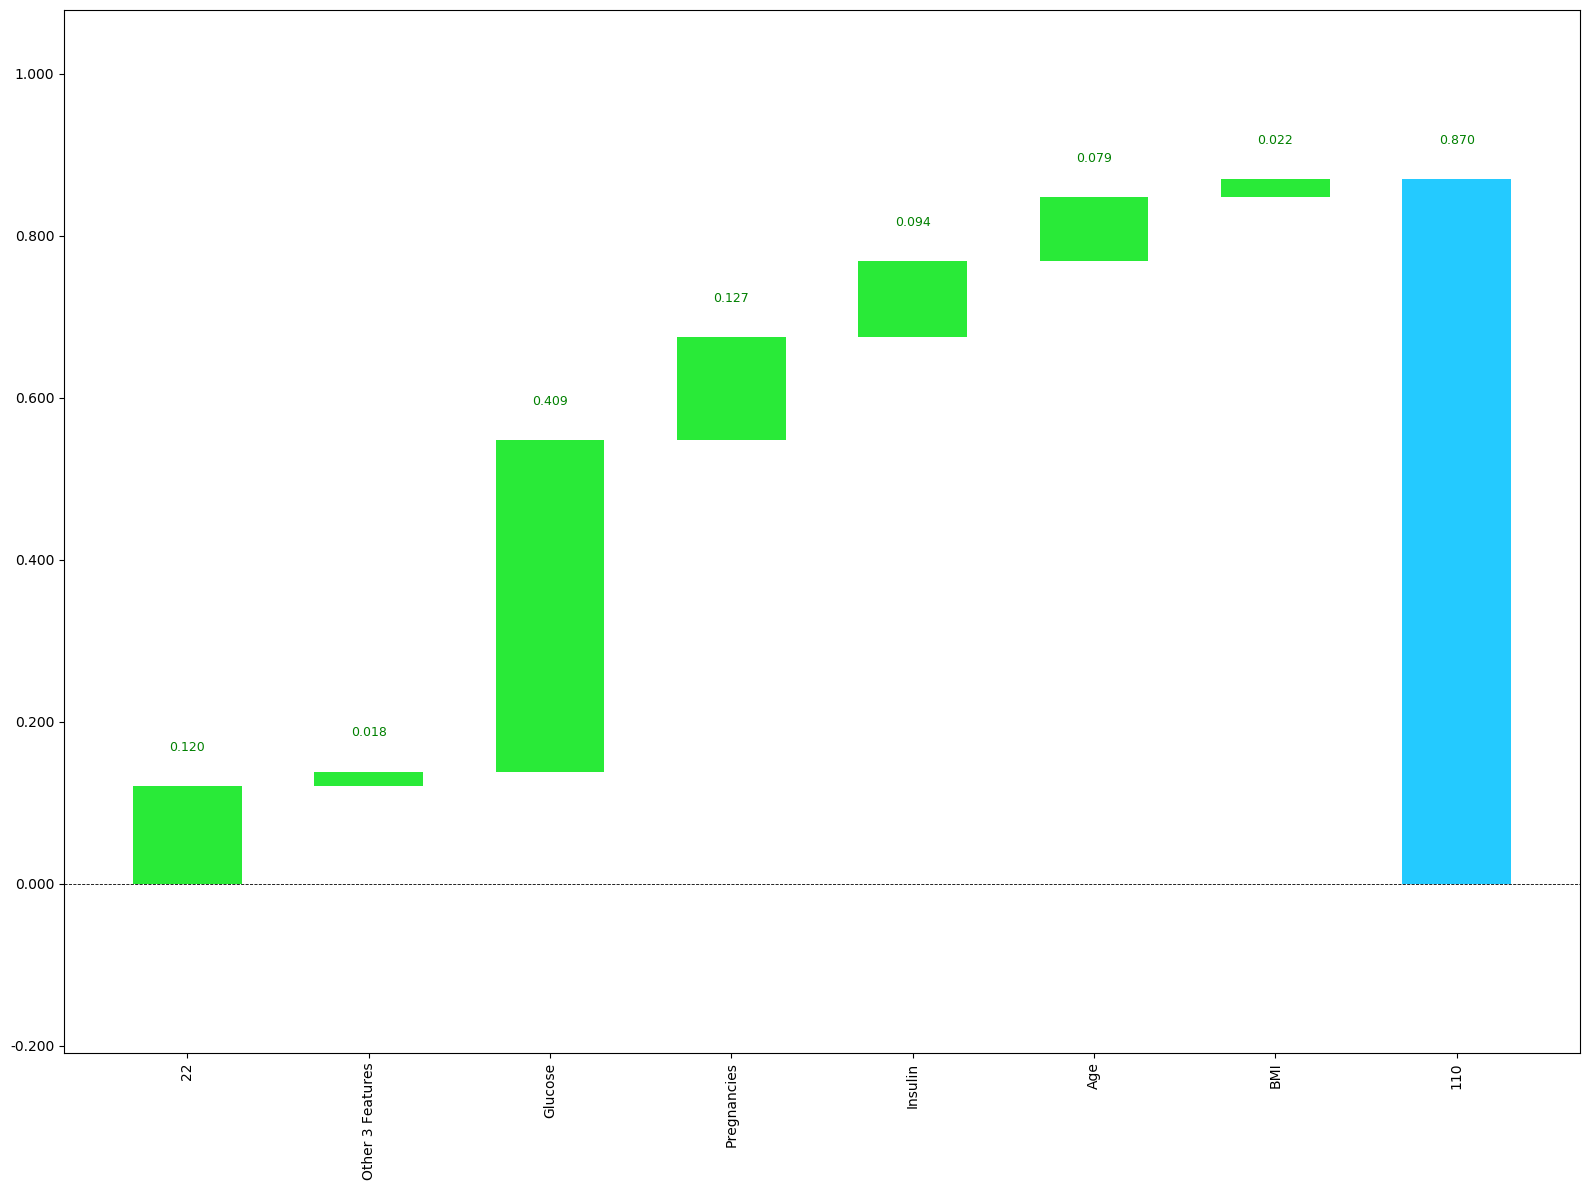

In [17]:
shapwaterfall(model,X_train, X_test, ref1 = 110, ref2 = 22, num_feature=5)

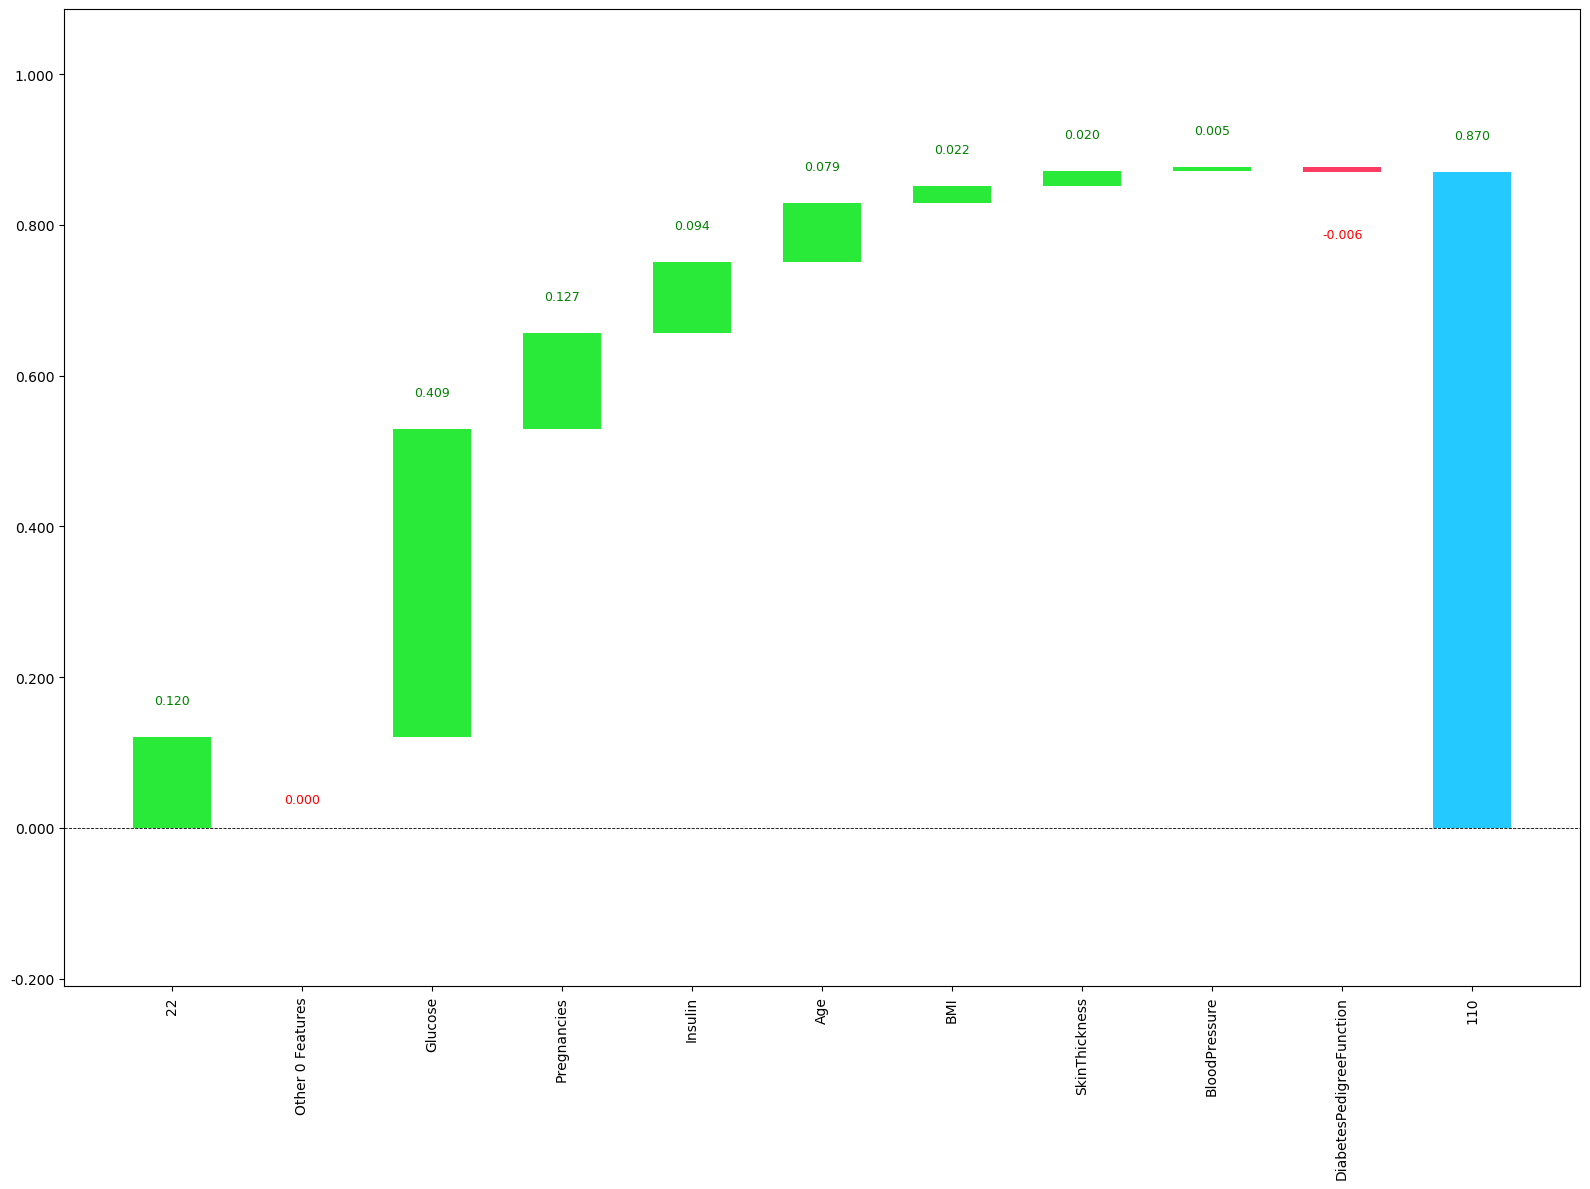

In [18]:
shapwaterfall(model,X_train, X_test, ref1 = 110, ref2 = 22, num_feature=8)

In [25]:
X_test[X_test.Reference==28]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Reference
640,0,102,86,17,105,29.3,0.695,27,28


In [26]:
X_test[X_test.Reference==205]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Reference
247,0,165,90,33,680,52.3,0.427,23,205


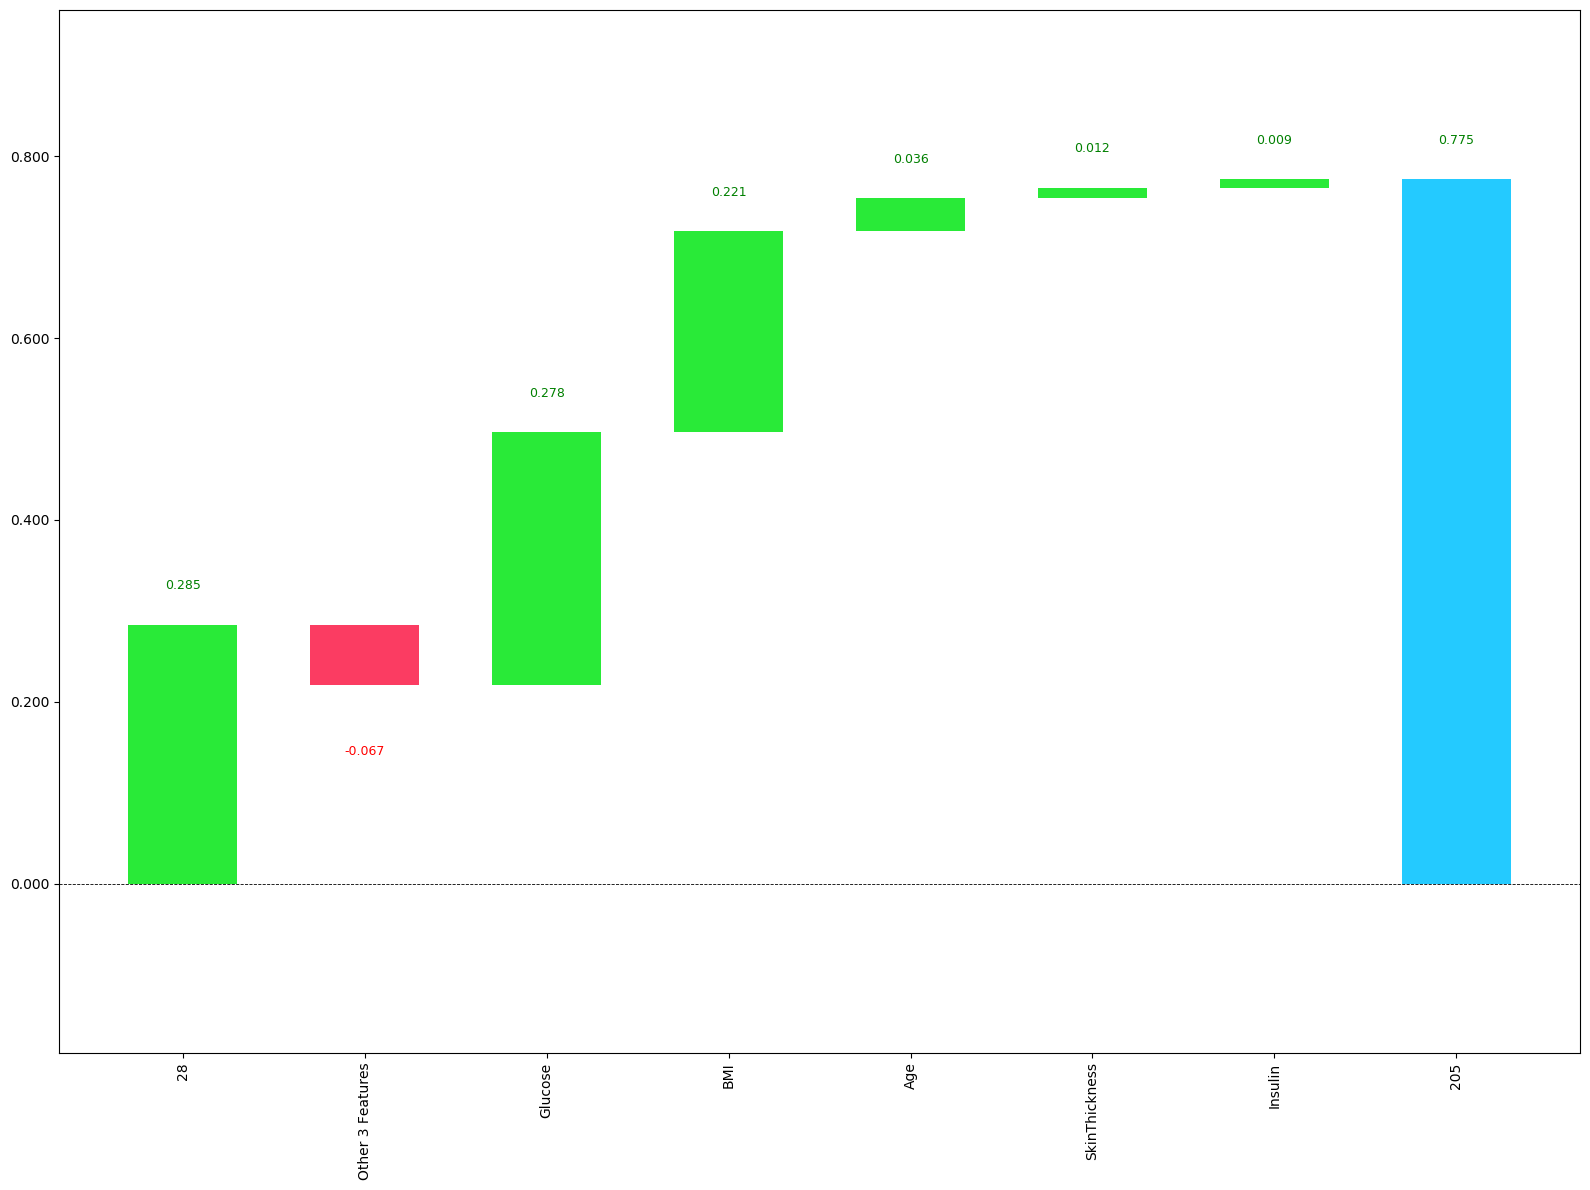

In [20]:
shapwaterfall(model,X_train, X_test, ref1 = 28, ref2 = 205, num_feature=5)

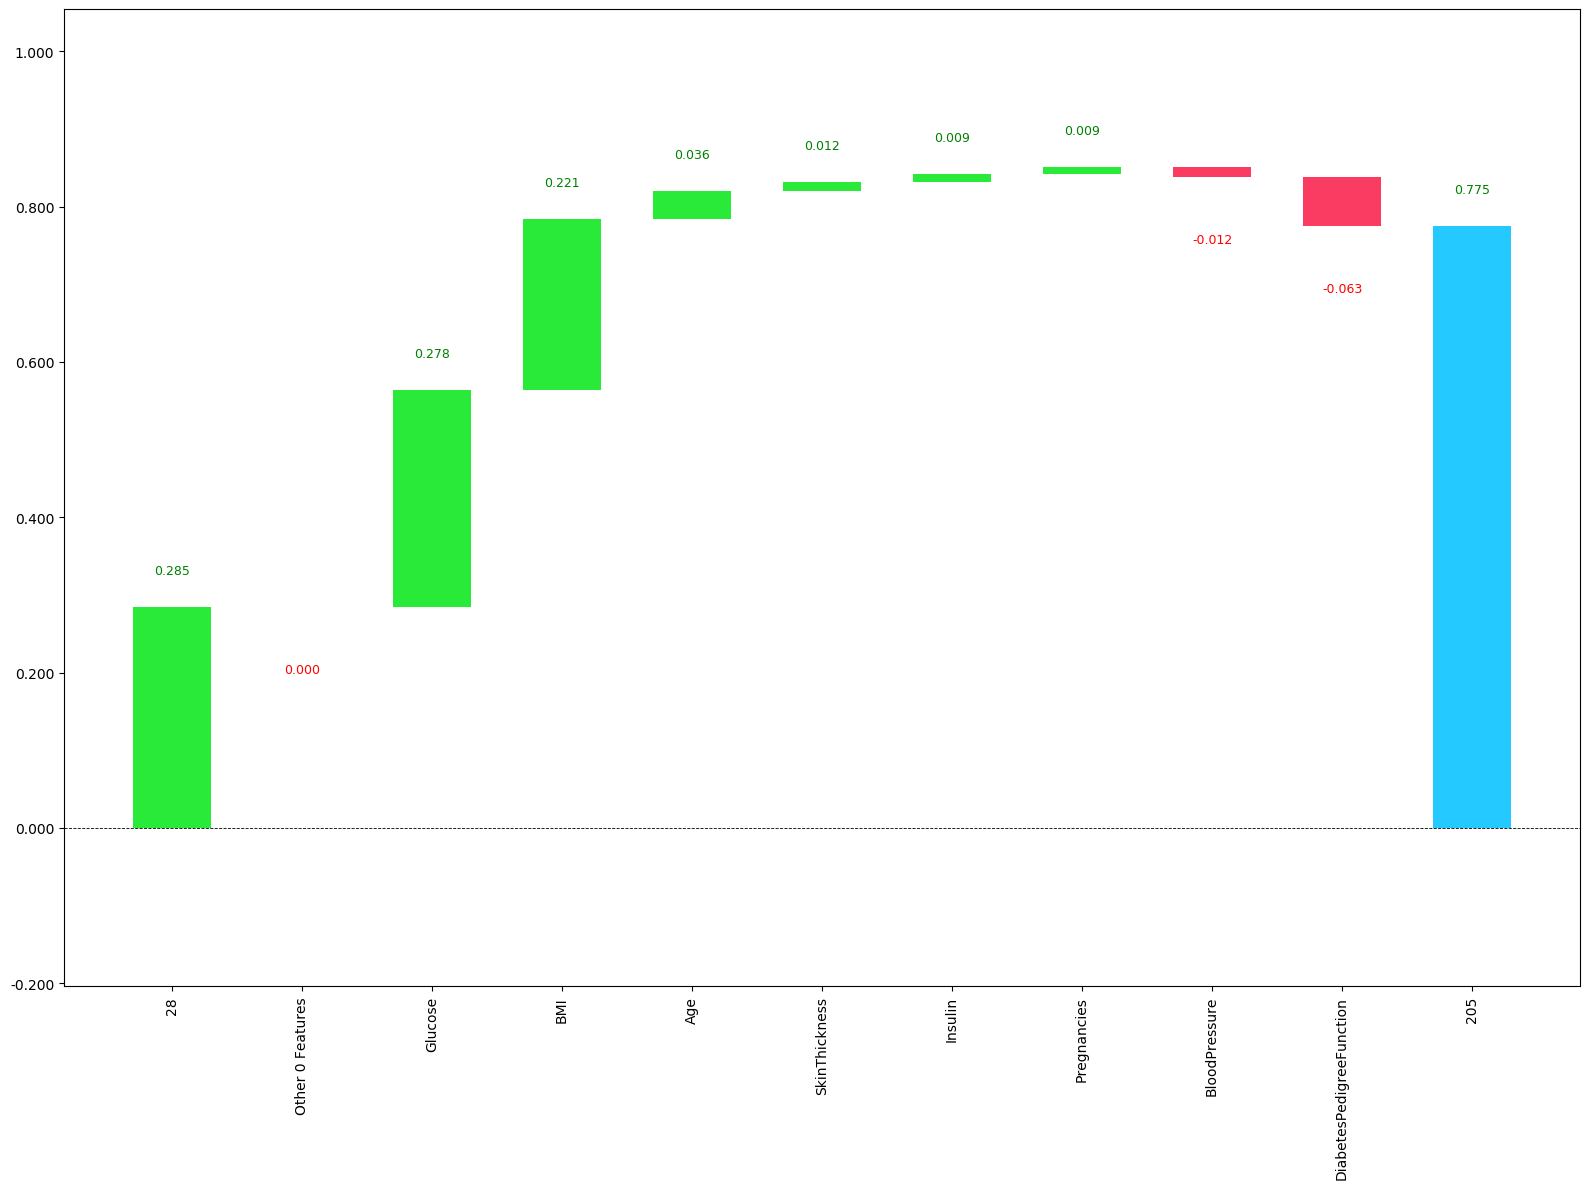

In [21]:
shapwaterfall(model,X_train, X_test, ref1 = 28, ref2 = 205, num_feature=8)